## I. For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### 1. Has the network latency gone up since we switched internet service providers?

#### Restated:
Has network latency (in time) increased with the new ISP?
#### H0 (null hypothesis) =
Network latency with the new ISP is the same or less than the old ISP.
#### Ha (alt.hypothesis) = 
Network latency is greater with the new ISP.
#### True positive example:
Network latency is greater with the new ISP, and our hypothesis testing rejects H0.
#### True negative example:
Network latency is the same between the two, and our hypothesis testing accepts H0.
#### Type I error (false pos.) example:
Network latency is the same, but we reject the H0 and say the new one is longer.
#### Type II error (false neg.) example:
Network latency is greater with the new ISP, but we accept H0 (that they are the same or its decreased).

### 2. Is the website redesign any good?

#### Restated:
Is the new website design leading to more sales?
#### H0 (null hypothesis) =
Sales rates and metrics related to the website are the same for both designs, or have decreased.
#### Ha (alt.hypothesis) = 
Sales rates and metrics related to the website are greater for new design.
#### True positive example:
Sales rates and metrics related to the website are up and we rejected the H0.
#### True negative example:
Sales rates and metrics related to the website haven't changed, and we've accepted the H0 (that they wouldn't).
#### Type I error (false pos.) example:
Sales rates and metrics related to the website haven't changed, but we reject the H0 and say they are greater.
#### Type II error (false neg.) example:
Sales rates and metrics related to the website have improved, but we accept the H0 thinking they haven't (or have decreased).

### 3. Is our television ad driving more sales?

#### Restated:
During the time and in the markets where our television ad plays, have sales increased compared to other markets and times without the ad?
#### H0 (null hypothesis) =
Sales are no different or lower between the markets and times where the ad plays, and where it does not.
#### Ha (alt.hypothesis) = 
Sales are different between the markets and times where the ad plays, and where it does not.
#### True positive example:
When/where the ad plays sales go up, and we have rejected H0.
#### True negative example:
When/where the ad plays sales are no different than elsewhere, and we have accepted H0.
#### Type I error (false pos.) example:
When/where the ad plays sales are no different than elsewhere, but we reject the H0 and say sales are better.
#### Type II error (false neg.) example:
When/where the ad plays sales go up, but we accept H0 (that they are the same).

## II. t-tests

In [225]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env

### 4. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [58]:
office1_mean = 90
office1_sdev = 15
office1_n = 40

office2_mean = 100
office2_sdev = 20
office2_n = 50

office1 = np.random.normal(office1_mean, office1_sdev, office1_n)
office2 = np.random.normal(office2_mean, office2_sdev, office2_n)

alpha = .05

#30+ samples, independant, test variances:
office1.var(), office2.var()
#unequal variances

#H0 - There is no differnce in time.
#Ha - There is a difference in time.
#Two sided t-test

t,p = stats.ttest_ind_from_stats(office1_mean, office1_sdev, office1_n, office2_mean, office2_sdev, office2_n, equal_var = False)
p

# p < alpha, therefore we reject the null hypothesis

0.00811206270346016

0.008 < .05, thus we reject the null hypothesis

### 5. From pydataset use 'mpg'

In [16]:
from pydataset import data
mpg = data('mpg')

#### (5a) Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [35]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [27]:
cars_2008 = mpg[mpg.year == 2008].efficiency
cars_1999 = mpg[mpg.year == 1999].efficiency
cars_1999.count(), cars_2008.count()

(117, 117)

In [31]:
#n = 117 for both so can assume normalcy.  Lets check descriptive stats:
cars_2008.mean(), cars_1999.mean(), cars_2008.std(), cars_1999.std()

(20.076923076923077, 20.22222222222222, 4.90891842528482, 5.207936766511732)

In [59]:
t,p = stats.ttest_ind(cars_2008, cars_1999, equal_var = True)
t, p

(-0.21960177245940962, 0.8263744040323578)

We do not reject the null hypothesis that there is no difference in fuel econ between 1999 and 2008

#### (5b) Are compact cars more fuel-efficient than the average car?

In [40]:
mpg['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [44]:
cars_compact = mpg[mpg['class'] == 'compact'].efficiency
cars = mpg.efficiency
cars_compact. describe()
cars.describe()

count    234.000000
mean      20.149573
std        5.050290
min       10.500000
25%       15.500000
50%       20.500000
75%       23.500000
max       39.500000
Name: efficiency, dtype: float64

In [46]:
t,p = stats.ttest_ind_from_stats(cars_compact.mean(), cars_compact.std(), cars_compact.count(), cars.mean(), cars.std(), cars.count(), equal_var = False)
t, p

(6.646345489688162, 2.3577939603784718e-09)

We reject the null hypothesis that compact cars have the same fuel economy as the average car (compact inclusive).

#### (5c) Do manual cars get better gas mileage than automatic cars?

In [48]:
mpg['trans'].unique()

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [56]:
cars_auto = mpg[mpg['trans'].str.contains('auto')].efficiency
cars_man = mpg[mpg['trans'].str.contains('manual')].efficiency

t,p = stats.ttest_ind_from_stats(cars_auto.mean(), cars_auto.std(), cars_auto.count(), cars_man.mean(), cars_man.std(), cars_man.count(), equal_var = False)
t, p

(-4.443514012903071, 1.795224899991793e-05)

In [57]:
cars_auto.mean(), cars_man.mean()

(19.130573248407643, 22.227272727272727)

We reject the null hypothesis that manual and automatic cars get the same gas mileage.

## III. Correlation

### 6. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [135]:
# import telco data from wherever it lives
telco = pd.read_csv('telco_data.csv')
telco = telco.dropna()
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7038 entries, 0 to 7048
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                7038 non-null   object 
 1   gender                     7038 non-null   object 
 2   is_senior_bool             7038 non-null   int64  
 3   is_senior                  7038 non-null   object 
 4   payment_type               7038 non-null   object 
 5   monthly_charges            7038 non-null   float64
 6   total_charges              7038 non-null   float64
 7   churn                      7038 non-null   object 
 8   tenure                     7038 non-null   float64
 9   is_female_bool             7038 non-null   int64  
 10  has_churned_bool           7038 non-null   int64  
 11  has_phone_bool             7038 non-null   int64  
 12  has_internet_bool          7038 non-null   int64  
 13  contract_details           7038 non-null   objec

<AxesSubplot:xlabel='total_charges', ylabel='full_months_tenure'>

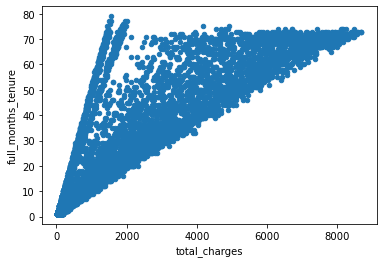

In [136]:
#scatterplot the tenure 
telco.plot.scatter(y='full_months_tenure', x='total_charges')

<AxesSubplot:xlabel='monthly_charges', ylabel='full_months_tenure'>

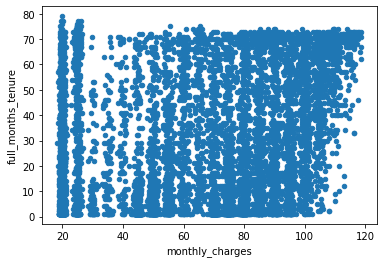

In [139]:
telco.plot.scatter(y='full_months_tenure', x='monthly_charges')

r = 0.8257946976871967
p = 0.0


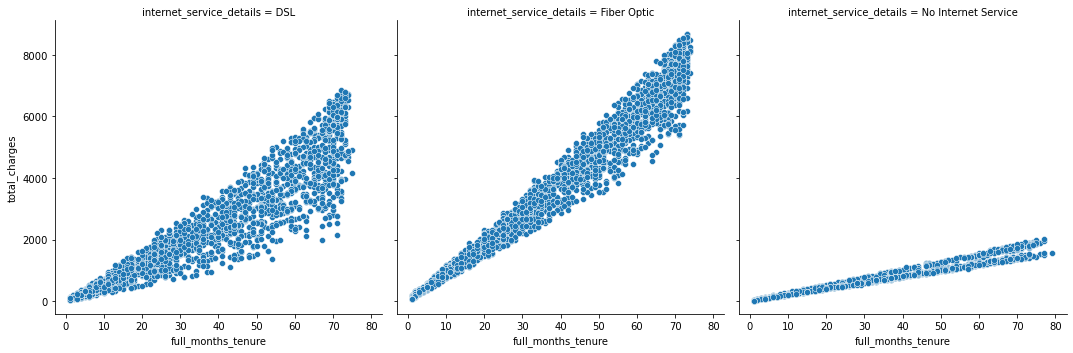

In [140]:
x = telco.full_months_tenure
y = telco.total_charges.fillna(0)
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)
sns.relplot(data = telco, y = 'total_charges',x = 'full_months_tenure', col='internet_service_details')

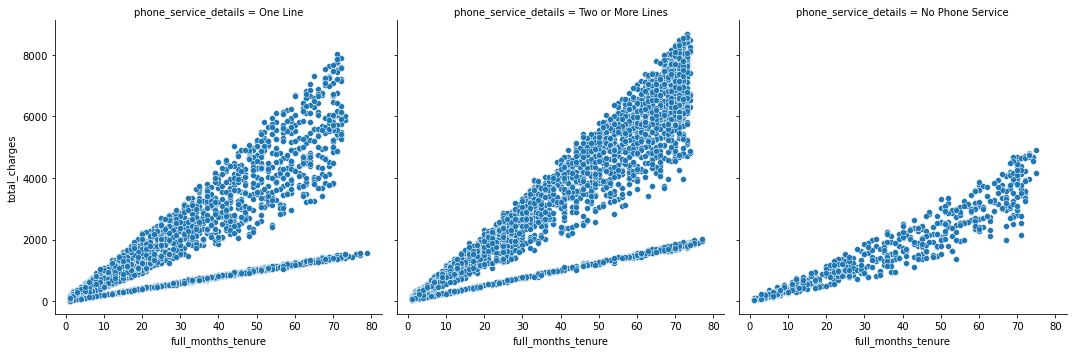

In [141]:
sns.relplot(data = telco, y = 'total_charges',x = 'full_months_tenure', col='phone_service_details')

### 7. Use the employees database.

In [161]:
from env import get_db_url

#### (7a) Is there a relationship between how long an employee has been with the company and their salary?

In [103]:
query = '''
SELECT 
    employees.emp_no,
    salaries.salary,
    DATEDIFF(IF(salaries.to_date > NOW(),
                NOW(),
                salaries.to_date),
            employees.hire_date) / 365 AS Tenure
FROM
    employees
        JOIN
    salaries USING (emp_no);
'''

salaries = pd.read_sql(query, get_db_url('employees'))
salaries.head()

,emp_no,salary,Tenure
0,10001,60117,1.0
1,10001,62102,2.0
2,10001,66074,3.0
3,10001,66596,4.0
4,10001,66961,5.0


<AxesSubplot:xlabel='Tenure', ylabel='salary'>

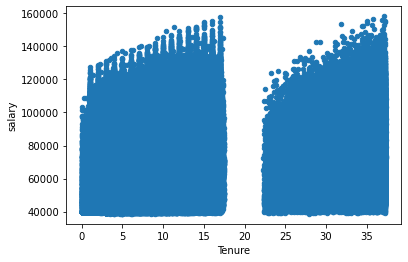

In [107]:
salaries.plot.scatter(y='salary', x='Tenure')

In [110]:
r, p = stats.pearsonr(salaries.Tenure, salaries.salary)
r,p

(0.3072319257599605, 0.0)

#### (7b) Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [123]:
query = '''
SELECT 
    employees.emp_no,
    MAX(DATEDIFF(IF(titles.to_date > NOW(),
                NOW(),
                titles.to_date),
            employees.hire_date) / 365) AS Tenure,
    COUNT(titles.title) AS Titles
FROM
    employees
        JOIN
    titles USING (emp_no)
    GROUP BY emp_no;
'''

title_count = pd.read_sql(query, get_db_url('employees'))
title_count.sample(10)

,emp_no,Tenure,Titles
232980,432956,36.0137,2
230202,430178,35.6630,2
271641,471617,34.5205,2
247781,447757,36.1479,2
83136,93137,11.3233,2
286913,486889,27.5288,1
114606,214582,34.7233,2
218357,418333,28.5014,2
118845,218821,35.0082,1
10641,20642,32.9096,2


<AxesSubplot:xlabel='Tenure', ylabel='Titles'>

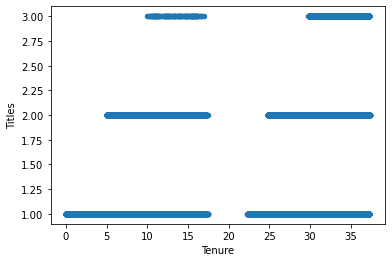

In [124]:
title_count.plot.scatter(y='Titles', x='Tenure')

In [126]:
r, p = stats.pearsonr(title_count.Titles, title_count.Tenure)
r,p

(0.3492143792631931, 0.0)

### 8. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [131]:
from pydataset import data
sleep = data("sleepstudy")

In [132]:
sleep.describe()

,Reaction,Days,Subject
count,180.000000,180.000000,180.000000
mean,298.507892,4.500000,341.277778
std,56.328757,2.880293,20.320905
min,194.332200,0.000000,308.000000
25%,255.375825,2.000000,331.000000
50%,288.650800,4.500000,336.000000
75%,336.752075,7.000000,352.000000
max,466.353500,9.000000,372.000000


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

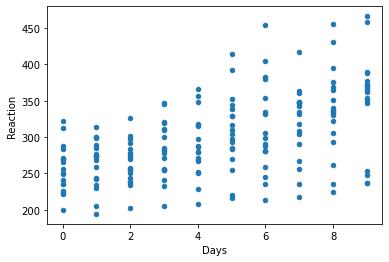

In [133]:
sleep.plot.scatter(y='Reaction',x='Days')

In [134]:
r, p = stats.pearsonr(sleep.Reaction, sleep.Days)
r,p

(0.5352302262650253, 9.894096322214812e-15)

## IV. Chi2 Correlation

### 1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [334]:
observed = [[49,20],[1,30]]  #rows - macbook yes/no, columns = codeup/not
observed = pd.DataFrame(observed, index=['Macbook','Not Macbook'], columns=['Codeup','Not Codeup'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
p, observed

(1.4116760526193828e-09,
              Codeup  Not Codeup
 Macbook          49          20
 Not Macbook       1          30)

We reject the null hyothesis that being a Codeup student and macbook user are not independant.

### 2. Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [147]:
mpg = data('mpg')
mpg.sample(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
23,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv
58,dodge,durango 4wd,3.9,1999,6,auto(l4),4,13,17,r,suv


In [155]:
#(2a) Are manufacturer and class related?
# H0: Manufacturer and car class are independant of one another.
# H1: Car class is related to manufacturer.
alpha2a = .05
obs_manufacturer_class = pd.crosstab(mpg.manufacturer,mpg['class'])
obs_manufacturer_class.head()

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
manufacturer,,,,,,,
audi,0,15,3,0,0,0,0
chevrolet,5,0,5,0,0,0,9
dodge,0,0,0,11,19,0,7
ford,0,0,0,0,7,9,9
honda,0,0,0,0,0,9,0


In [156]:
chi2, p, degf, expected = stats.chi2_contingency(obs_manufacturer_class)
p

5.267718408816259e-54

In [157]:
if p < alpha2a:
    print('Reject that null H')
else:
    print('We cannot reject that the variables are indepedant')

Reject that null H


In [159]:
obs_cyl_year = pd.crosstab(mpg.cyl, mpg.year)
obs_cyl_year

year,1999,2008
cyl,,
4,45,36
5,0,4
6,45,34
8,27,43


In [160]:
chi2, p, degf, expected = stats.chi2_contingency(obs_cyl_year)
p

0.01702768537665195

p < .05 meaning we reject the Null hypothesis and say that there is a relationship between year and engine cylinder, albeit weak...

### 3. Use the data from the employees database to answer the following questions:


#### (3a) Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [315]:
# SQL query that pulls current employees with their gender and seperated into Sales a& Marketing or not

In [175]:
query3a = '''
SELECT 
    departments.dept_name, dept_emp.emp_no, employees.gender
FROM
    departments
        JOIN
    dept_emp USING (dept_no)
        JOIN
    employees USING (emp_no)
WHERE
    dept_emp.to_date < NOW();
'''

employees3a = pd.read_sql(query3a, get_db_url('employees'))
employees3a['sales_marketing'] = employees3a.dept_name.isin(['Sales','Marketing'])

obs_gender_dept = pd.crosstab(employees3a.gender, employees3a.sales_marketing)
obs_gender_dept

sales_marketing,False,True
gender,,
F,28715,8028
M,42851,11885


In [176]:
chi2, p, degf, expected = stats.chi2_contingency(obs_gender_dept)
p

0.6315360266913086

He accept the null hypothesis that gender and working in sales and marketing are independant.

#### (3b) Is an employee's gender independent of whether or not they are or have been a manager?

In [204]:
#Select all the managers ever:
query3b1 = '''
SELECT employees.gender, COUNT(employees.gender) AS manager_count 
FROM employees 
JOIN dept_manager USING(emp_no) 
GROUP BY employees.gender;
'''
query3b2 = '''
SELECT employees.gender, COUNT(employees.gender) AS total_count 
FROM employees 
LEFT JOIN dept_manager USING(emp_no) 
GROUP BY employees.gender;
'''

emp3b1 = pd.read_sql(query3b1, get_db_url('employees'))
emp3b2 = pd.read_sql(query3b2, get_db_url('employees'))

non_managers = emp3b2.total_count - emp3b1.manager_count
non_managers[0], non_managers[1]
asdf = [[11,179962],[13,120038]]

chi2, p, degf, expected = stats.chi2_contingency(asdf)
p

0.22745818732810363

## V. Bonus

To reinforce the content, I decided to examine the Titanic Database and run each of the types of hypothesis testing to find correlations within the data.

In [241]:
# Load database
## import url signup info from env.py
from env import get_db_url

## create SQL code (test tehre first!)
query = '''
SELECT *
FROM passengers;
'''

## assign sql query result to a dataframe variable
titanics = pd.read_sql(query, get_db_url('titanic_db'))

## describe the data
titanics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [216]:
# What questions do we want to answer about this data?
# - Is younger age {cont} associated with survival {cat}? (t-test, one sided)
# - Is higher average fare paid {cont} associated with survival{cat}? (t-test, one-sided)
# - Are Passenger class {cat} and survival {cat} correlated?
# - Are fare {cont} and class {cat} (t-test, two-sided)
# - Are fare {cont} and age {cont} corelated? {needed a pearsonr}
# - Alone {cat} and embarktown {cat} - Is there a correlation between these folks?
# - Alone {cat} and survived {cat}?

1    537
0    354
Name: alone, dtype: int64

Is age associated with survival?

$H0:$ Younger people were no more likely to survive than an average aged passenger or older. or, the mean age of suvivors is greater than or equal to the average passenger age.
$Ha:$ Younger people were more likely to survive than an average aged passenger or older. or, the mean age of surviors is less than the average age.

<AxesSubplot:xlabel='survived', ylabel='age'>

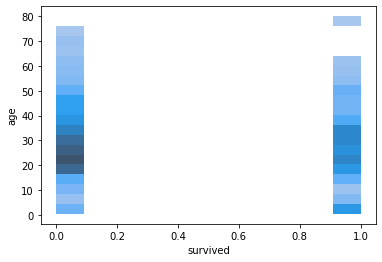

In [223]:
sns.histplot(x='survived', y='age', data=titanics)

In [251]:
alpha = .05 #will use this for all hypothesis testing

#first use only na values
t2 = titanics[titanics.age >0]

survivors = t2[t2.survived == 1]
mean_age = t2.age.mean()
mean_age

29.69911764705882

In [262]:
t,p = stats.ttest_1samp(survivors.age, mean_age)
p = p/2
t, p

(-1.5438553337279277, 0.06185882576453591)

In [261]:
if p < alpha:
    print('We reject the null hypothesis that mean age of survivors is greater than or equal to the average passenger age')
else:
    print('We fail to reject the null hypothesis that the mean age of survivors is greater than or equal to the average passenger age')

We fail to reject the null hypothesis that the mean age of survivors is greater than or equal to the average passenger age


So, while we fail to determine if passenger age has anything to do with survivalship, we notice it is close and the t is negative, so we can almost reject the null hypothesis - certainly at only a 90% CI.

#### Fair cost and survival

In [279]:
#we have equal numbers of entries for fare and survival, so no need to clean data
# H0: no difference between fare and survival
# Ha: higher fare folks survived more than average

survivors = titanics[titanics.survived == 1]
mean_fare = titanics.fare.mean()
mean_fare

t,p = stats.ttest_1samp(survivors.fare, mean_fare)
p = p/2
p

4.74879037261462e-06

In [280]:
if p < alpha:
    print('We reject the null hypothesis that higher fare customers survived at the same rate as the average fare customer')
else:
    print('We fail to reject the null hypothesis of blah blah')

We reject the null hypothesis that higher fare customers survived at the same rate as the average fare customer


#### Passenger Class and Survival

In [288]:
observations = pd.crosstab(titanics.pclass, titanics.survived)

chi2, p, degf, expected = stats.chi2_contingency(observations)

p

4.549251711298793e-23

#### Are fare and age correlated?

<AxesSubplot:xlabel='age', ylabel='fare'>

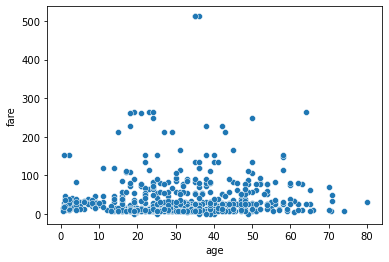

In [293]:
sns.scatterplot(data=titanics[titanics.age>0], x='age',y='fare')

In [296]:
r, p = stats.pearsonr(t2.fare, t2.age)
r,p

(0.09606669176903906, 0.010216277504441524)

Looks like there is the slightest correlations between r and p.

#### Alone and embarcation point?

In [304]:
t3 = titanics[titanics.embark_town > '']
t3

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [307]:
observed = pd.crosstab(t3.embark_town, t3.alone)

chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(12.7923491426013,
 0.0016679256151052033,
 2,
 array([[ 66.8976378 , 101.1023622 ],
        [ 30.66141732,  46.33858268],
        [256.44094488, 387.55905512]]))

In [310]:
observed

alone,0,1
embark_town,,
Cherbourg,83,85
Queenstown,20,57
Southampton,251,393


In [314]:
#alone vs survived:
observed = pd.crosstab(titanics.alone,titanics.survived)
observed

chi2, p, degf, expected = stats.chi2_contingency(observed)
observed, p, expected

(survived    0    1
 alone             
 0         175  179
 1         374  163,
 1.9726543846517113e-09,
 array([[218.12121212, 135.87878788],
        [330.87878788, 206.12121212]]))

### Tips categorical programmatic comparison!

In [316]:
tips = data('tips')
tips.sample(3)

,total_bill,tip,sex,smoker,day,time,size
139,16.00,2.0,Male,Yes,Thur,Lunch,2
185,40.55,3.0,Male,Yes,Sun,Dinner,2
94,16.32,4.3,Female,Yes,Fri,Dinner,2


In [319]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [347]:
import itertools
categories = ['sex','smoker','day','time','size']
tips_categorical = tips[categories]
tips_categorical

combinations = list(itertools.combinations(categories,2))
combinations
# create a list of combinations
# outcomes = []
# for combination in combinations:
# outcome = {}
# pull combo indexes out


[('sex', 'smoker'),
 ('sex', 'day'),
 ('sex', 'time'),
 ('sex', 'size'),
 ('smoker', 'day'),
 ('smoker', 'time'),
 ('smoker', 'size'),
 ('day', 'time'),
 ('day', 'size'),
 ('time', 'size')]

In [348]:
alpha = .05
outcomes = []
for combination in combinations:
    outcome = {}
    outcome['column1'] = combination[0]
    outcome['column2'] = combination[1]
    observed = pd.crosstab(tips[combination[0]],tips[combination[1]])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    outcome['p'] = p
    
    if p < alpha:
        outcome['reject_null'] = True
    else:
        outcome['reject_null'] = False
    
    outcomes.append(outcome)
pd.DataFrame(outcomes)

,column1,column2,p,reject_null
0,sex,smoker,1.000000e+00,False
1,sex,day,4.180302e-03,True
2,sex,time,2.237400e-03,True
3,sex,size,3.217222e-01,False
4,smoker,day,1.056757e-05,True
5,smoker,time,4.771486e-01,False
6,smoker,size,3.402489e-01,False
7,day,time,8.449898e-47,True
8,day,size,1.331648e-02,True
9,time,size,7.595297e-03,True


In [352]:
tips[['smoker','sex']]

,smoker,sex
1,No,Female
2,No,Male
3,No,Male
4,No,Male
5,No,Female
...,...,...
240,No,Male
241,Yes,Female
242,Yes,Male
243,No,Male
